# Computer Hardware Data Set 
 
[Computer Hardware dataset](https://archive.ics.uci.edu/ml/datasets/Computer+Hardware) originated from UCI Machine Learning repository, created by Phillip Ein-Dor and Jacob Feldmesser from Tel Aviv University in Ramat-Aviv, Israel, and donated by David W. Aha. 

the dataset contains 209 instances and 10 attributes: 6 features, 1 target variable, 2 non predective and the estimated value the original owner found using Linear Regression. 

#### Attribute information :
<ol>
    <li>Vendor name: contains 30 names of vendors of the hardware set</li>
    <li>Model name: unique set of symbols</li>
    <li>MYCT: machine cycle time in nano-seconds</li>
    <li>MMIN: minimum main memory in kilo-bytes</li>
    <li>MMax: maximum main memory in kilo-bytes</li>
    <li>CACH: cache memory in kilo-bytes</li>
    <li>CHMIN: minimum channels in units</li>
    <li>CHMAX: maximum channels in units</li>
    <li>PRP: published relative performance</li>
    <li>ERP: estimated relative performance by the owner</li>
</ol>

In [1]:
# importing the libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(rc={"font.size":8, "axes.labelsize":5, "figure.figsize":(11.7,8.27)})
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

In [2]:
# importing the data

columns = ['vendor_name', 'model_name', 'machine_cycle', 'min_memory', 'max_memory', 
           'cache', 'min_channel', 'max_channel', 'performance', 'estim_performance']
machine = pd.read_csv("datasets/machine.data", names = columns)

print(machine.head())

  vendor_name model_name  machine_cycle  min_memory  max_memory  cache  \
0     adviser      32/60            125         256        6000    256   
1      amdahl     470v/7             29        8000       32000     32   
2      amdahl    470v/7a             29        8000       32000     32   
3      amdahl    470v/7b             29        8000       32000     32   
4      amdahl    470v/7c             29        8000       16000     32   

   min_channel  max_channel  performance  estim_performance  
0           16          128          198                199  
1            8           32          269                253  
2            8           32          220                253  
3            8           32          172                253  
4            8           16          132                132  


In [3]:
# data cleaning operations 
print(machine.shape)
print(machine.info())

(209, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   vendor_name        209 non-null    object
 1   model_name         209 non-null    object
 2   machine_cycle      209 non-null    int64 
 3   min_memory         209 non-null    int64 
 4   max_memory         209 non-null    int64 
 5   cache              209 non-null    int64 
 6   min_channel        209 non-null    int64 
 7   max_channel        209 non-null    int64 
 8   performance        209 non-null    int64 
 9   estim_performance  209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
None


In [4]:
print(machine.describe())

       machine_cycle    min_memory    max_memory       cache  min_channel  \
count     209.000000    209.000000    209.000000  209.000000   209.000000   
mean      203.822967   2867.980861  11796.153110   25.205742     4.698565   
std       260.262926   3878.742758  11726.564377   40.628722     6.816274   
min        17.000000     64.000000     64.000000    0.000000     0.000000   
25%        50.000000    768.000000   4000.000000    0.000000     1.000000   
50%       110.000000   2000.000000   8000.000000    8.000000     2.000000   
75%       225.000000   4000.000000  16000.000000   32.000000     6.000000   
max      1500.000000  32000.000000  64000.000000  256.000000    52.000000   

       max_channel  performance  estim_performance  
count   209.000000   209.000000         209.000000  
mean     18.267943   105.622010          99.330144  
std      25.997318   160.830733         154.757102  
min       0.000000     6.000000          15.000000  
25%       5.000000    27.000000          

In [5]:
# select the features and target variable
machine_data = machine[['machine_cycle', 'min_memory', 'max_memory', 
           'cache', 'min_channel', 'max_channel', 'performance', 'estim_performance']]

array([[<AxesSubplot:title={'center':'machine_cycle'}>,
        <AxesSubplot:title={'center':'min_memory'}>,
        <AxesSubplot:title={'center':'max_memory'}>],
       [<AxesSubplot:title={'center':'cache'}>,
        <AxesSubplot:title={'center':'min_channel'}>,
        <AxesSubplot:title={'center':'max_channel'}>],
       [<AxesSubplot:title={'center':'performance'}>,
        <AxesSubplot:title={'center':'estim_performance'}>,
        <AxesSubplot:>]], dtype=object)

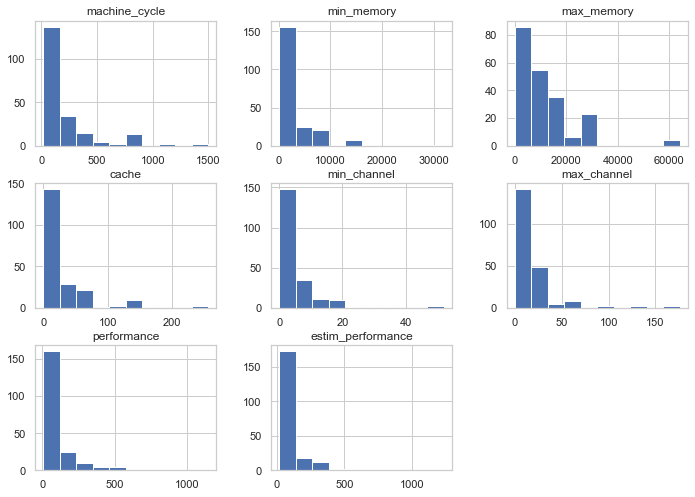

In [6]:
machine_data.hist()

#### Extracting insight from data

<AxesSubplot:>

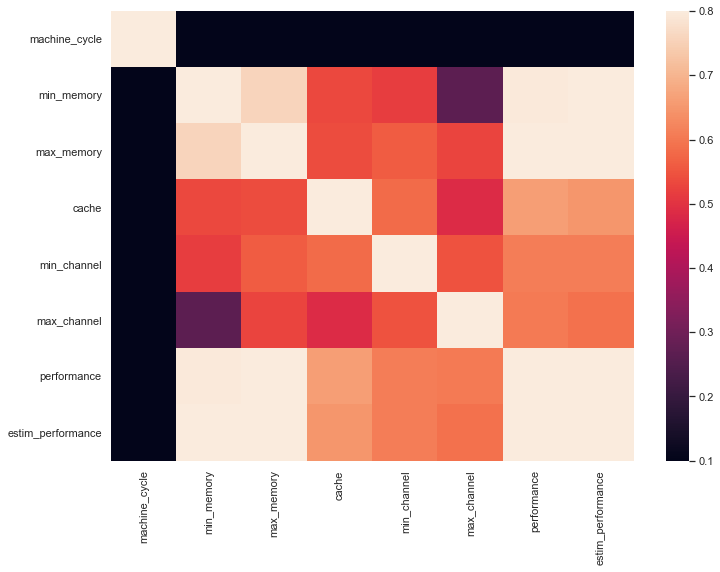

In [7]:
sns.heatmap(machine_data.corr(), vmax=0.8, vmin=0.1)

The target variable performance is correlated with memory, cache and channel but not correlated with machine cycle. 

<AxesSubplot:>

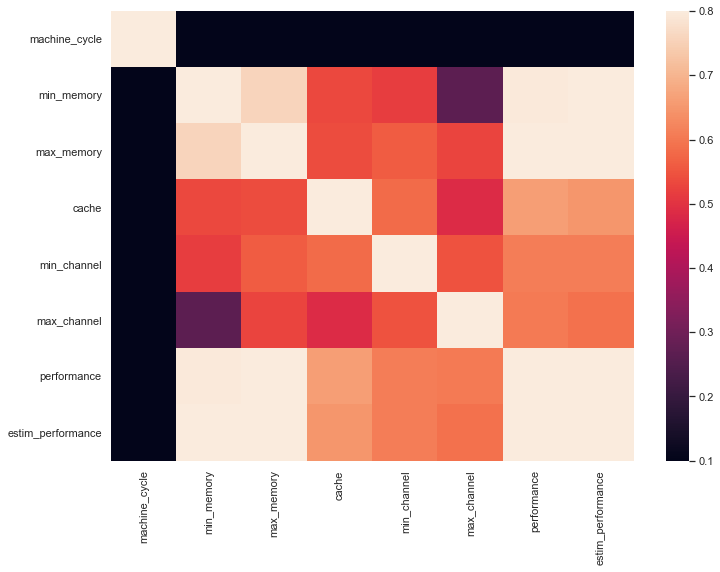

In [8]:
# is the correlation matrix gonna change after normalizing the data? 
normalized_data = machine_data.apply(lambda x: (x - np.min(x)/(np.max(x) - np.min(x))))
sns.heatmap(normalized_data.corr(), vmax = 0.8, vmin = 0.1)

#### Building the Regression model

In [9]:
from sklearn.model_selection import train_test_split

X = machine_data[['machine_cycle', 'min_memory', 'max_memory', 'cache', 'min_channel', 'max_channel']]
y = machine_data["performance"]

print(X.shape)
print(y.shape)

(209, 6)
(209,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(146, 6)
(63, 6)
(146,)
(63,)


##### Linear regression model only

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(model.intercept_)
print(model.coef_)

-64.73966705360833
[ 0.0563826   0.01647953  0.00593762  0.58876771 -0.78383999  1.56379865]


In [14]:
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse = 3737.308828156598
r2 = 0.8833772929137685


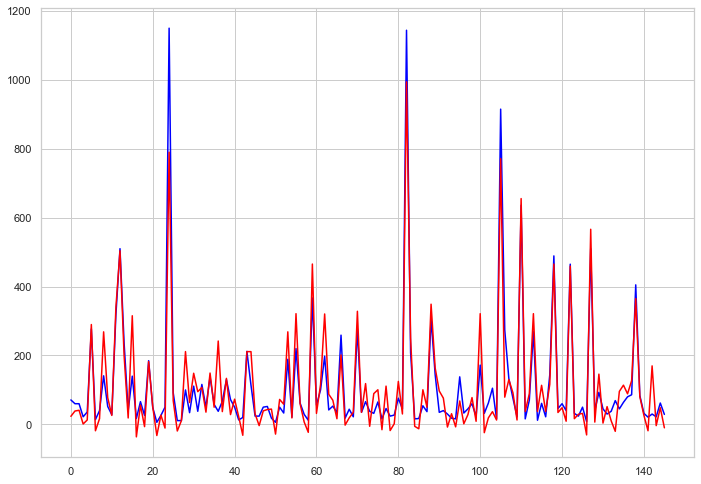

In [15]:
# verify how good the model is by predecting the known data
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"mse = {mse}")
print(f"r2 = {r2}")

index_1 = [i for i in range(len(y_train))]

plt.plot(index_1, y_train, color="blue")
plt.plot(index_1, y_pred, color="red")
plt.show()

mse = 3034.1988690805033
r2 = 0.7216457293169191


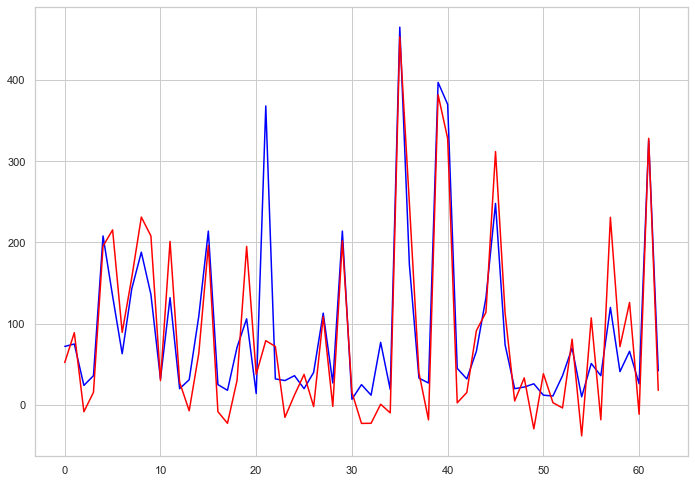

In [16]:
# predict new data with test dataset
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"mse = {mse}")
print(f"r2 = {r2}")

index_2 = [i for i in range(len(y_test))]

plt.plot(index_2, y_test, color="blue")
plt.plot(index_2, y_pred_test, color="red")
plt.show()

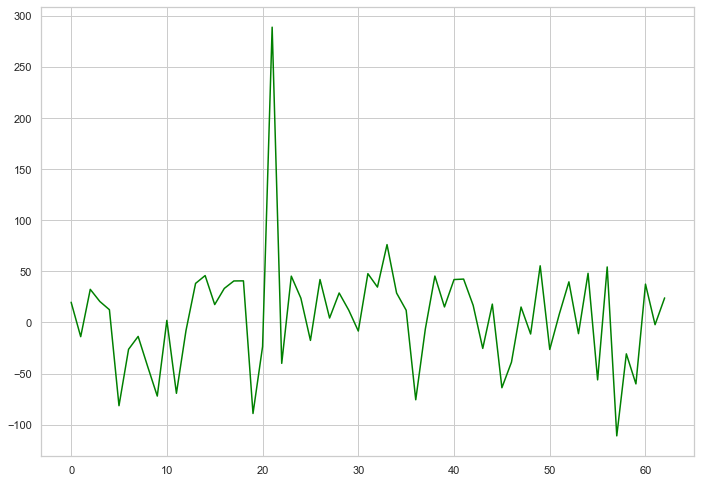

In [17]:
# the errors 
index_2 = [i for i in range(len(y_test))]

plt.plot(index_2, y_test - y_pred_test, color="green")

##### Statsmodels for model validation

In [18]:
import statsmodels.api as sm 

X_1 = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_1).fit()

print(lm_1.params)

const           -64.739667
machine_cycle     0.056383
min_memory        0.016480
max_memory        0.005938
cache             0.588768
min_channel      -0.783840
max_channel       1.563799
dtype: float64


In [19]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     175.5
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.73e-62
Time:                        18:04:01   Log-Likelihood:                -807.67
No. Observations:                 146   AIC:                             1629.
Df Residuals:                     139   BIC:                             1650.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -64.7397      9.783     -6.618

R-squared value for this model is around 88% significant, but while verifying the p values for each feature we can see that machine cycle and min_channel are not significant for the model. 

In [20]:
X_sm = X_train[['min_memory', 'max_memory', 'cache', 'max_channel']]
X_2 = sm.add_constant(X_sm)

lm_2 = sm.OLS(y_train, X_2).fit()

print(lm_2.params)

const         -50.059162
min_memory      0.015918
max_memory      0.005663
cache           0.517646
max_channel     1.512281
dtype: float64


In [21]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     254.3
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.09e-63
Time:                        18:04:12   Log-Likelihood:                -810.80
No. Observations:                 146   AIC:                             1632.
Df Residuals:                     141   BIC:                             1647.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -50.0592      7.499     -6.676      

P-value for all the features is significant, we can say that the model can be written: <br>
$\hat{y} = -50.05 + 0.01 min memory + 0.0057 maxmemory + 0.517 cache + 1.5123 maxchannel$

In [22]:
# make predections using lm_2
X = machine_data[['min_memory', 'max_memory', 'cache', 'max_channel']]
X = sm.add_constant(X)

Predicted_performance = lm_2.predict(X)
print(Predicted_performance.shape)
print(machine_data["performance"].shape)

(209,)
(209,)


In [23]:
mse = mean_squared_error(machine_data["performance"], Predicted_performance)
r_squared = r2_score(machine_data["performance"], Predicted_performance)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 3671.5841644915918
r_square_value : 0.8573741137075285


Text(0, 0.5, 'Performance')

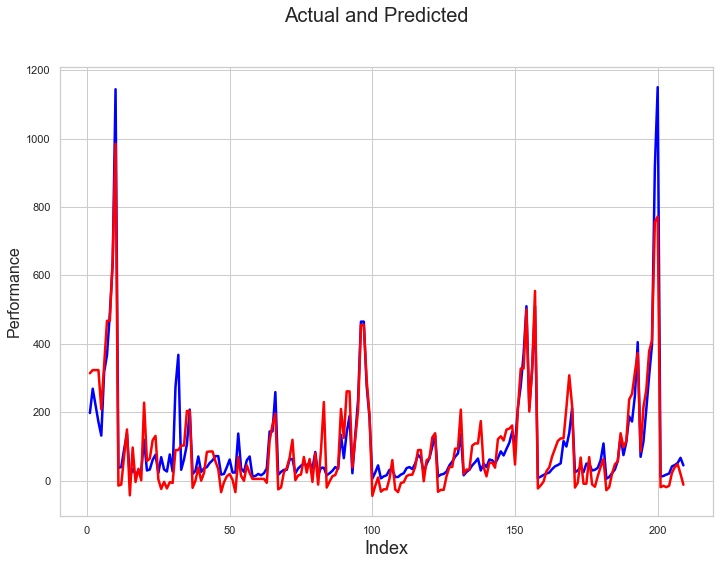

In [24]:
#Actual vs Predicted
c = [i for i in range(1, len(X)+1)]

fig = plt.figure()

plt.plot(c, machine_data["performance"], color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, Predicted_performance, color="red",  linewidth=2.5, linestyle="-")

fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Performance', fontsize=16)                               # Y-label

Text(0, 0.5, 'performance - predicted performance')

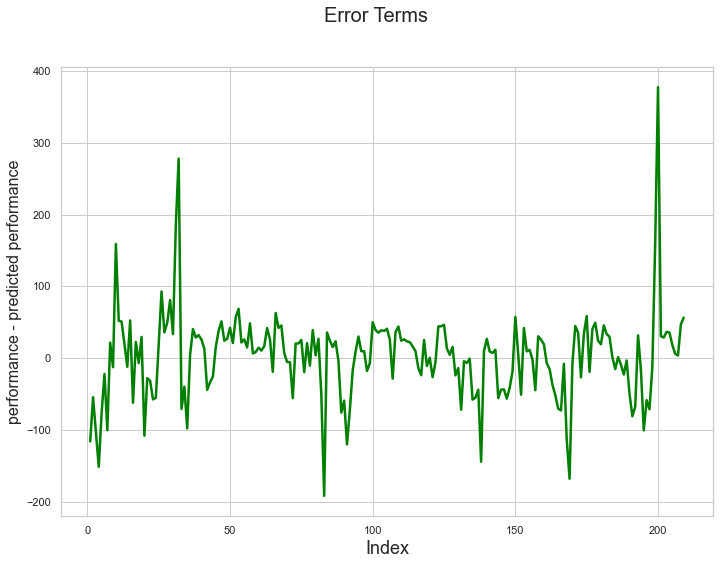

In [25]:
# Error terms
c = [i for i in range(1, len(X)+1)]

fig = plt.figure()
plt.plot(c,machine_data["performance"]-Predicted_performance, color="green", linewidth=2.5, linestyle="-")

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('performance - predicted performance', fontsize=16)    

#### compare the data from every model: 
     
     * real performance 
     * estimated performance by the data owner 
     * Regression model performance 
     * statistical model performance 

In [26]:
models = []
models.append(("real_perf", machine_data['performance']))
models.append(("estim_perf" , machine_data['estim_performance']))
models.append(("reg_model" , model.predict(machine_data[['machine_cycle', 'min_memory', 
                                                         'max_memory', 'cache', 'min_channel', 'max_channel']])))
models.append(("stat_model" , Predicted_performance))

print("name: \t\t mse \t\t r2 \t\t %error ")

for name, m in models:
    mse = mean_squared_error(machine_data["performance"], m)
    r_squared = r2_score(machine_data["performance"], m)
    error_pct = sum((machine_data['performance'] - m) / sum(machine_data['performance'])) * 100
    msg = "%s: \t %f \t %f \t %f " % (name, mse, r_squared, error_pct)
    print(msg)

name: 		 mse 		 r2 		 %error 
real_perf: 	 0.000000 	 1.000000 	 0.000000 
estim_perf: 	 1737.334928 	 0.932512 	 5.956965 
reg_model: 	 3525.366592 	 0.863054 	 1.742758 
stat_model: 	 3671.584164 	 0.857374 	 2.412562 


### Conclusion: 

The estimated performance the data owner predicted has the highest R-squared value. yet it has the most errors. 